In [337]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [338]:
import os
print(os.getcwd())

os.chdir('/content/drive/MyDrive/Colab Notebooks')
!ls

/content/drive/My Drive/Colab Notebooks
AIP1		bandit-master  sample_submit.csv  submit2.csv  test.csv
AIP2		dataset        sub.csv		  submit3.csv  train.csv
AI_Quest.ipynb	Kaggle	       submit1.csv	  submit.csv


In [339]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submit.csv', names=('id', 'pred'))

1	accommodates	int	収容可能人数

2	amenities	char	アメニティ

3	bathrooms	float	風呂数

4	bed_type	char	ベッドの種類

5	bedrooms	float	ベッドルーム数

6	beds	float	ベッド数

7	cancellation_policy	char	キャンセルポリシー

8	city	char	都市

9	cleaning_fee	int	クリーニング料金を含むか

10	description	char	説明

11	first_review	char	最初のレビュー日

12	host_has_profile_pic	int	ホストの写真があるかどうか

13	host_identity_verified	int	ホストの身元確認が取れているか

14	host_response_rate	char	ホストの返信率

15	host_since	char	ホストの登録日

16	instant_bookable	char	即時予約可能か

17	last_review	char	最後のレビュー日

18	latitude	float	緯度

19	longitude	float	経度

20	name	char	物件名

21	neighbourhood	char	近隣情報

22	number_of_reviews	int	レビュー数

23	property_type	char	物件の種類

24	review_scores_rating	float	レビュースコア

25	room_type	char	部屋の種類

26	thumbnail_url	char	サムネイル画像リンク

27	zipcode	int	郵便番号

28	y	float	宿泊価格


In [340]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [341]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

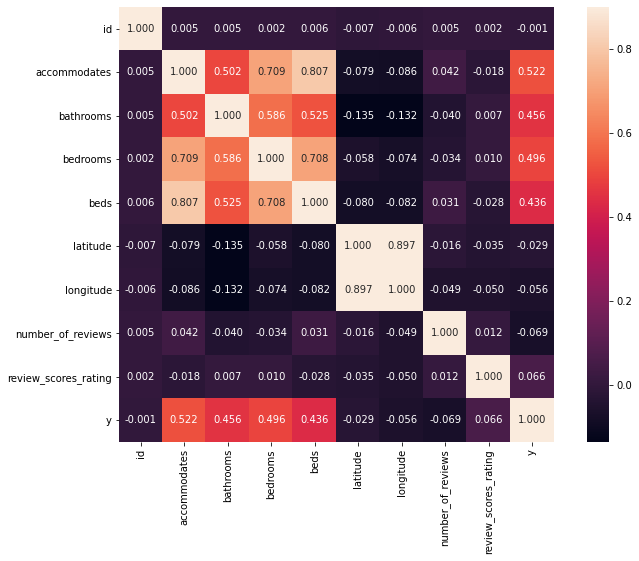

In [342]:
corrmat = train.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='1.3f')

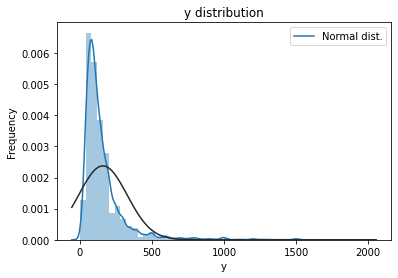

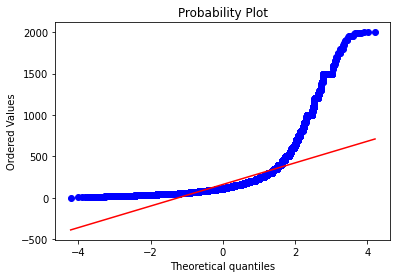

In [343]:
sns.distplot(train['y'] , fit=norm)
plt.legend(['Normal dist.'])
plt.ylabel('Frequency')
plt.title('y distribution')

# 正規QQプロットの適用
fig = plt.figure()
res = stats.probplot(train['y'], plot=plt)
plt.show()

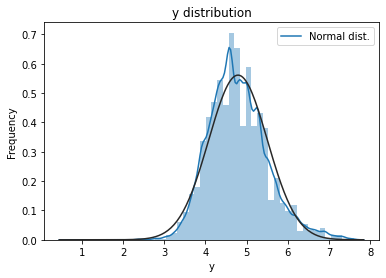

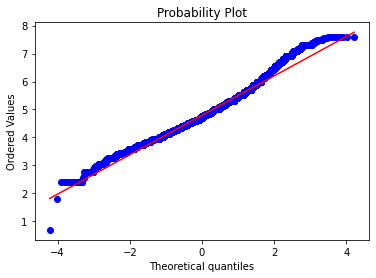

In [344]:
train['y'] = np.log1p(train['y'])

sns.distplot(train['y'] , fit=norm)
plt.legend(['Normal dist.'])
plt.ylabel('Frequency')
plt.title('y distribution')

# 正規QQプロットの適用
fig = plt.figure()
res = stats.probplot(train['y'], plot=plt)
plt.show()

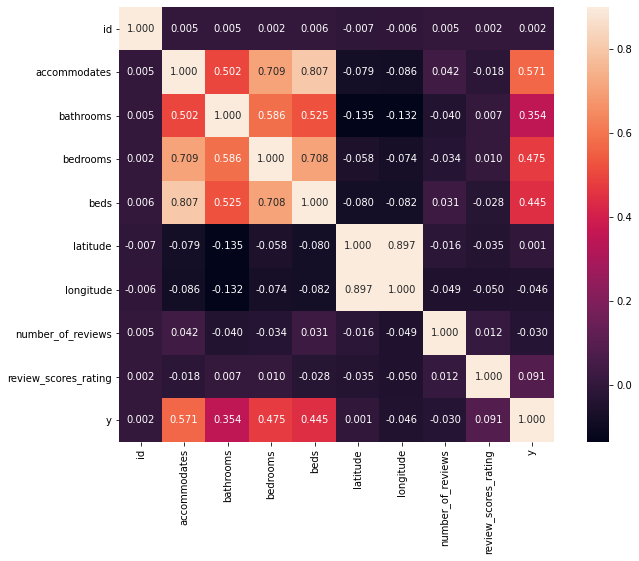

In [345]:
corrmat = train.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='1.3f')

yと相関が高いのは

accommodates(収容可能人数)

bathrooms(風呂の数)

bedrooms(ベッド部屋の数)

beds(ベッドの数)

In [346]:
# ラベルエンコーディング
cols =  ['bed_type','cancellation_policy','city','cleaning_fee','host_identity_verified','host_has_profile_pic','host_response_rate','instant_bookable','property_type','room_type','neighbourhood']
dataset = pd.concat([train, test], sort=False)
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

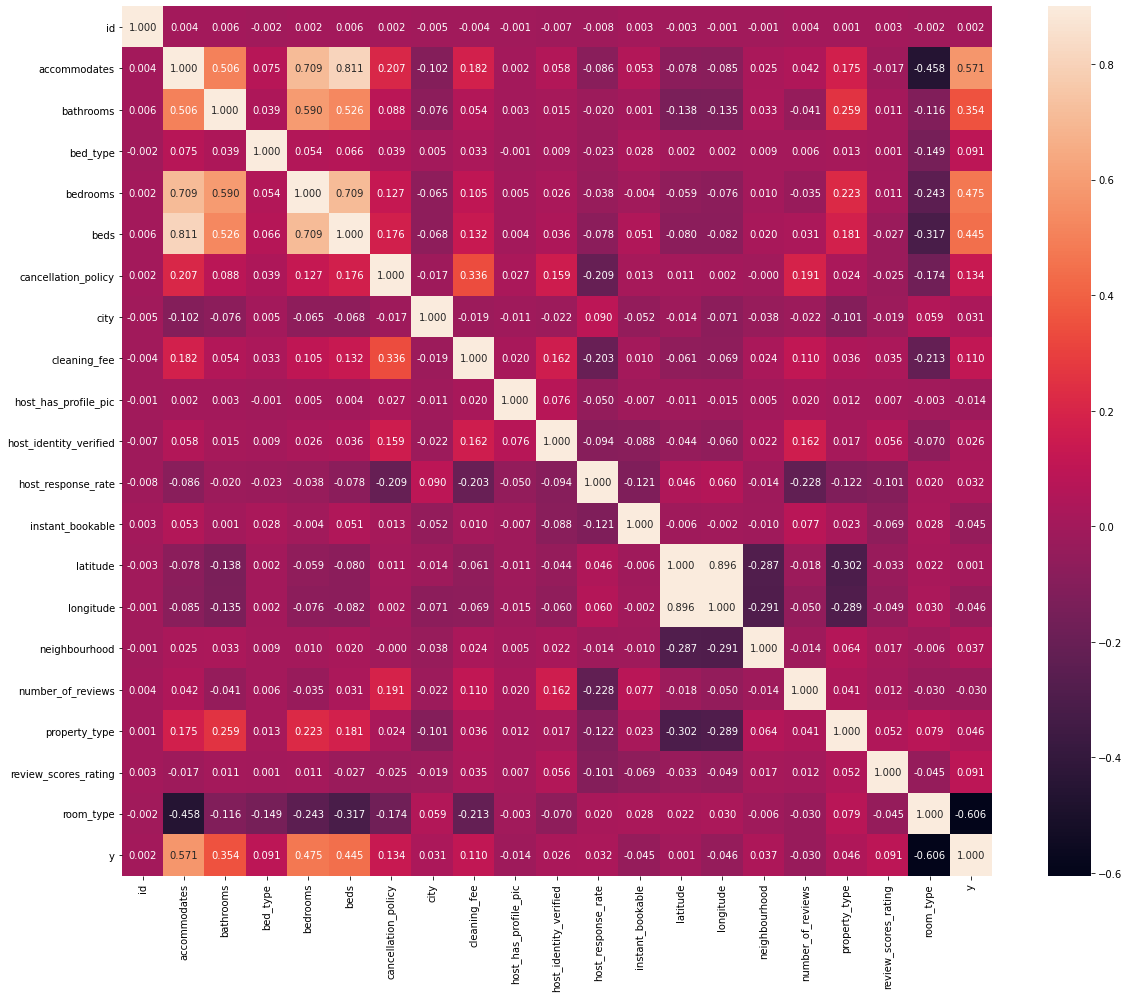

In [347]:
corrmat = dataset.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='1.3f')

In [348]:
dataset.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   200
bed_type                      0
bedrooms                     91
beds                        131
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
property_type                 0
review_scores_rating      16722
room_type                     0
thumbnail_url              8216
zipcode                     966
y                         18528
dtype: int64

In [349]:
dataset.dtypes

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                object
first_review               object
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                 object
instant_bookable            int64
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

In [350]:
dataset['bathrooms'].fillna(np.mean(dataset['bathrooms']), inplace=True)
dataset['bedrooms'].fillna(np.mean(dataset['bedrooms']), inplace=True)
dataset['beds'].fillna(np.mean(dataset['beds']), inplace=True)
dataset['review_scores_rating'].fillna(np.mean(dataset['review_scores_rating']), inplace=True)
dataset['amenities'] = dataset['amenities'].apply(lambda x: sum(len(word) for word in str(x).split(",")))
dataset['description'] = dataset['description'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dataset['name'] = dataset['name'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

In [351]:
dataset.dtypes

id                          int64
accommodates                int64
amenities                   int64
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
description                 int64
first_review               object
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate          int64
host_since                 object
instant_bookable            int64
last_review                object
latitude                  float64
longitude                 float64
name                        int64
neighbourhood               int64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

In [352]:
cols = ['id', 'first_review', 'host_since', 'last_review', 'thumbnail_url', 'zipcode', 'y']
dataset = dataset.drop(cols, axis=1)

In [353]:
dataset.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type
0,6,83,2.0,4,1.0,4.0,0,3,1,304,2,0,80,0,33.788931,-118.154761,12,619,1,0,60.0,1
1,2,350,1.0,4,1.0,1.0,2,2,1,337,2,2,2,0,38.934810,-76.978190,23,74,9,17,100.0,1
2,2,442,2.0,4,1.0,1.0,2,4,1,389,2,0,2,1,40.695118,-73.926240,39,84,27,0,83.0,1
3,2,218,1.0,4,1.0,1.0,2,5,1,817,2,2,2,1,37.796728,-122.411906,31,390,38,0,95.0,1
4,2,218,1.0,4,1.0,1.0,2,4,1,828,2,2,2,0,40.785050,-73.974691,30,556,5,0,100.0,0


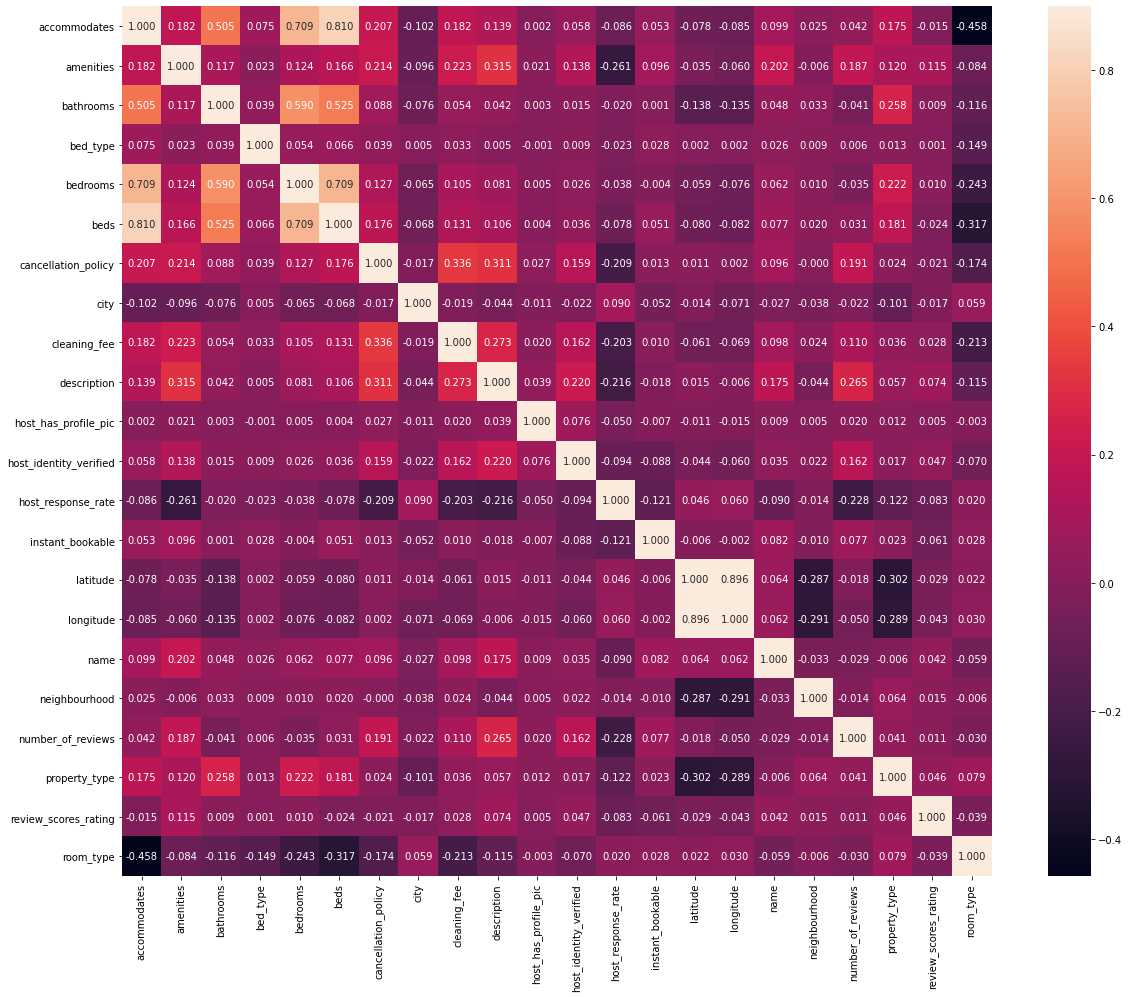

In [354]:
corrmat = dataset.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt='1.3f')

In [355]:
dataset.isnull().sum()

accommodates              0
amenities                 0
bathrooms                 0
bed_type                  0
bedrooms                  0
beds                      0
cancellation_policy       0
city                      0
cleaning_fee              0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
property_type             0
review_scores_rating      0
room_type                 0
dtype: int64

In [356]:
x_train = dataset[:len(train)]
x_test = dataset[len(train):]

In [357]:
y_train = train['y']

In [358]:
x_train.isnull().sum()

accommodates              0
amenities                 0
bathrooms                 0
bed_type                  0
bedrooms                  0
beds                      0
cancellation_policy       0
city                      0
cleaning_fee              0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
property_type             0
review_scores_rating      0
room_type                 0
dtype: int64

In [359]:
x_test.isnull().sum()

accommodates              0
amenities                 0
bathrooms                 0
bed_type                  0
bedrooms                  0
beds                      0
cancellation_policy       0
city                      0
cleaning_fee              0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
property_type             0
review_scores_rating      0
room_type                 0
dtype: int64

In [360]:
y_train.isnull().sum()

0

In [361]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [362]:
model_lgb = lgb.LGBMRegressor(num_leaves=300, 
                                    learning_rate=0.05, 
                                    n_estimators=1000, 
                                    random_state=2021)

In [363]:
model_lgb.fit(x_train, y_train)
pred_lgb = model_lgb.predict(x_train)
print('LGB score: {}'.format(model_lgb.score(x_train, y_train)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(pred_lgb)))))
# 300: 36.3580815359825
# 250: 42.46879234429919
# 200: 49.794105287349495
# 150: 57.585527682457446

LGB score: 0.9729454051347647
RMSE: 36.3580815359825


In [364]:
y_test_pred = model_lgb.predict(x_test)
y_test_pred = np.expm1(y_test_pred)

In [374]:
# 提出
sub['pred'] = y_test_pred
sub.to_csv('submit4.csv',index=False,header=None)

In [375]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18528 non-null  int64  
 1   pred    18528 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 289.6 KB


In [376]:
 sub.head()

,id,pred
0,0,207.715209
1,1,140.860101
2,2,85.972892
3,3,126.964184
4,4,141.448191


In [368]:
# class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
        
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
    
#     def predict(self, X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         return np.mean(predictions, axis=1) 

In [369]:
# model_gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, 
#                                             max_depth=17, max_features='sqrt',
#                                             min_samples_leaf=15, min_samples_split=10, 
#                                             loss='huber', random_state =2021)

In [370]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =2021, nthread = -1)

In [371]:
# averaged_models = AveragingModels(models = (model_lgb, model_gb, model_xgb))
# averaged_models.fit(x_train, y_train)

In [372]:
# print('-'*40)
# model_gb.fit(x_train, y_train)
# pred_gb = model_gb.predict(x_train)
# print('GB score: {}'.format(model_gb.score(x_train, y_train)))
# print('MSE: {}'.format(mean_squared_error(y_train, pred_gb)))
# print('-'*40)
# model_xgb.fit(x_train, y_train)
# pred_xgb = model_xgb.predict(x_train)
# print('XGB score: {}'.format(model_xgb.score(x_train, y_train)))
# print('MSE: {}'.format(mean_squared_error(y_train, pred_xgb)))